In [1]:
# Mounting google drive for accessing the file for training.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [3]:
with open('/content/drive/MyDrive/PublicAIData/sherlock-holm.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    file.close()

In [4]:
#Tokenizer process
tokenizer = Tokenizer()
#fit
tokenizer.fit_on_texts([text])
#assign length of word index
total_words = len(tokenizer.word_index) + 1

In [5]:
#chek the tokens
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'he': 10,
 'you': 11,
 'was': 12,
 'his': 13,
 'is': 14,
 'my': 15,
 'have': 16,
 'as': 17,
 'with': 18,
 'had': 19,
 'which': 20,
 'at': 21,
 'for': 22,
 'but': 23,
 'me': 24,
 'not': 25,
 'be': 26,
 'we': 27,
 'from': 28,
 'there': 29,
 'this': 30,
 'said': 31,
 'upon': 32,
 'so': 33,
 'holmes': 34,
 'him': 35,
 'her': 36,
 'she': 37,
 "'": 38,
 'very': 39,
 'your': 40,
 'been': 41,
 'all': 42,
 'on': 43,
 'no': 44,
 'what': 45,
 'one': 46,
 'then': 47,
 'were': 48,
 'by': 49,
 'are': 50,
 'an': 51,
 'would': 52,
 'out': 53,
 'when': 54,
 'up': 55,
 'man': 56,
 'could': 57,
 'has': 58,
 'do': 59,
 'into': 60,
 'mr': 61,
 'who': 62,
 'little': 63,
 'will': 64,
 'if': 65,
 'some': 66,
 'now': 67,
 'see': 68,
 'down': 69,
 'should': 70,
 'our': 71,
 'or': 72,
 'they': 73,
 'may': 74,
 'well': 75,
 'am': 76,
 'us': 77,
 'over': 78,
 'more': 79,
 'think': 80,
 'room': 81,
 'know': 82,
 'shall': 83

In [6]:
#declare ngrams
input_sequences = []
#split the sentence from '\n'
for line in text.split('\n'):
    #get tokens
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
setence_token = input_sequences[3] # [1, 1561, 5, 129, 34]
sentence = []
for token in setence_token:
    sentence.append(list((tokenizer.word_index).keys())[list((tokenizer.word_index).values()).index(token)])
print(sentence)

['the', 'adventures', 'of', 'sherlock', 'holmes']


In [8]:
#maximum sentence length
max_sequence_len = max([len(seq) for seq in input_sequences])
# input sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [9]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [10]:
#convert one-hot-encode
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [11]:
#create model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           820000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8200)              1238200   
                                                                 
Total params: 2208800 (8.43 MB)
Trainable params: 2208800 (8.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#train the model
# history = model.fit(X, y, epochs=100, verbose=1, validation_data=(X,y)) # memory issues
history = model.fit(X, y, epochs=50, verbose=1)

3010/3010 [==============================] - 30s 9ms/step - loss: 6.2397 - accuracy: 0.0763
Epoch 2/50
3010/3010 [==============================] - 17s 6ms/step - loss: 5.5209 - accuracy: 0.1245
Epoch 3/50
3010/3010 [==============================] - 17s 6ms/step - loss: 5.1368 - accuracy: 0.1471
Epoch 4/50
3010/3010 [==============================] - 17s 5ms/step - loss: 4.8109 - accuracy: 0.1643
Epoch 5/50
3010/3010 [==============================] - 17s 6ms/step - loss: 4.5130 - accuracy: 0.1809
Epoch 6/50
3010/3010 [==============================] - 17s 6ms/step - loss: 4.2302 - accuracy: 0.1995
Epoch 7/50
3010/3010 [==============================] - 17s 6ms/step - loss: 3.9616 - accuracy: 0.2243
Epoch 8/50
3010/3010 [==============================] - 17s 6ms/step - loss: 3.7036 - accuracy: 0.2538
Epoch 9/50
3010/3010 [==============================] - 17s 5ms/step - loss: 3.4616 - accuracy: 0.2856
Epoch 10/50
3010/3010 [==============================] - 17s 5ms/step - loss: 3.2330

In [13]:
results = model.evaluate(X, y, batch_size=128)
print("test loss, test acc:", results)

753/753 [==============================] - 4s 5ms/step - loss: 0.5436 - accuracy: 0.8723
test loss, test acc: [0.5436356067657471, 0.8722823262214661]


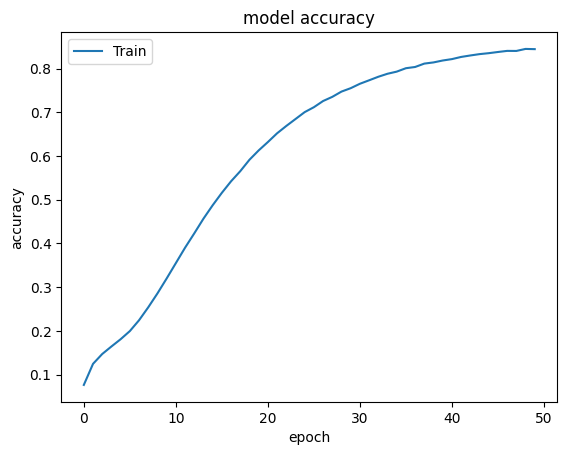

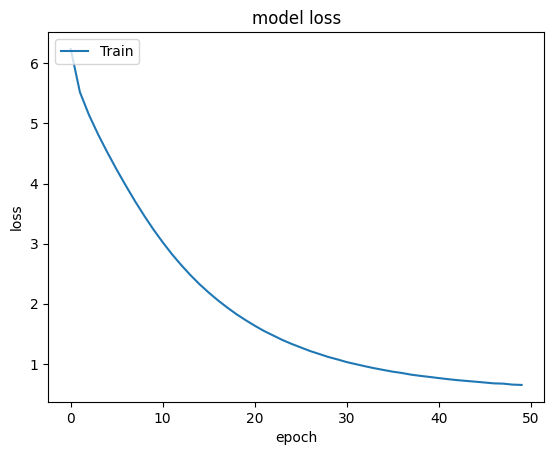

In [14]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy']) - should use validation data
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss']) - should use validation data
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
# saving the model to file
model.save("/content/drive/MyDrive/PublicAIData/nexWordPredict/nextWord.h5")

# save the tokenizer
# dump(tokenizer, open('/content/drive/MyDrive/PublicAIData/tokenizer.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Downloading the model
from google.colab import files
files.download("/content/drive/MyDrive/PublicAIData/nexWordPredict/nextWord.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/PublicAIData/nexWordPredict/nextWord.h5")

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           820000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8200)              1238200   
                                                                 
Total params: 2208800 (8.43 MB)
Trainable params: 2208800 (8.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#determine a text
seed_text = "I think we should have more"
# predict word number
next_words = 12

print(seed_text)

for _ in range(next_words):
    #convert to token
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    #path sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #model prediction
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    # get predict words
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

I think we should have more
1/1 [==============================] - 0s 16ms/step
I think we should have more than an best turn by become done boxed any £1000 this man
